# Cavity Coupling of Flip-Flop Qubits

$$
.
$$

In [1]:
import numpy as np
from scipy.linalg import expm
from src.BraKet import *
from src.DensityMatrix import *
from src.Hamiltonian import *
from src.Noise_Pink import *
from src.constants import *
import matplotlib.pyplot as plt
from src.plots import plotEvolution,plotEvolutionSingle, plotEvolutionDouble
import matplotlib
from matplotlib import rc
rc('text', usetex=True)
# %matplotlib widget
%matplotlib inline
import time
np.set_printoptions(linewidth=200)

In [2]:
def getRho(psi0, eps, wB, Vt, wc, N, g, wn, maxT, numPoints=100):
    unperturbedHamiltonian = FlipFlopCavityHamiltonian(eps, wB, Vt, wc, N, g)
    z03 = unperturbedHamiltonian.z03
    z33 = unperturbedHamiltonian.z33
    z31 = unperturbedHamiltonian.z31
    noiseInteractions = [ChargeNoiseHamiltonian(
        wn[q], z03[q], z33[q], z31[q], q, 2) for q in range(2)]
    rho = DensityMatrix(psi0, unperturbedHamiltonian, noiseInteractions)
    dt = maxT/numPoints
    timeRange = np.arange(0, maxT, dt)
    rhoT = rho(timeRange, True)
    rhoTNoNoise = rho(timeRange, False)
    return (timeRange, rhoT, rhoTNoNoise)


Output()

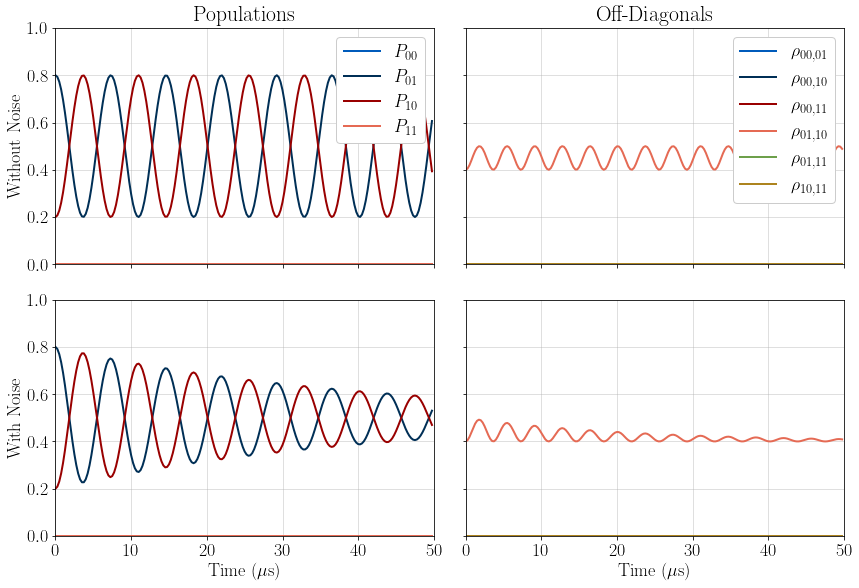

In [3]:
from ipywidgets import interactive_output
import ipywidgets as widgets
from IPython.display import display

c00 = widgets.FloatSlider(value=0, min=0, max=15.0, step=1,description=r'\( C_{00} \)', continuous_update=False)
c01 = widgets.FloatSlider(value=2, min=0, max=15.0, step=1,description=r'\( C_{01} \)', continuous_update=False)
c10 = widgets.FloatSlider(value=1, min=0, max=15.0, step=1,description=r'\( C_{10} \)', continuous_update=False)
c11 = widgets.FloatSlider(value=0, min=0, max=15.0, step=1,description=r'\( C_{11} \)', continuous_update=False)
wc = widgets.FloatSlider(value=10.8085, min=5.0, max=15.0, step=0.01, description=r'\( \omega_c \)', continuous_update=False)
N = widgets.IntSlider(value=0, min=0, max=100, step=1, description=r'\( N \)', continuous_update=False)
g = widgets.FloatSlider(value=0.05, min=0, max=1, step=0.01, description=r'\( g \)', continuous_update=False)
avg_eps = widgets.FloatSlider(value=1.15, min=0, max=5, step=0.01, description=r'\( \epsilon \)', continuous_update=False)
d_eps = widgets.FloatSlider(value=0, min=0, max=1, step=0.001, description=r'\( \Delta\epsilon \)', continuous_update=False)
avg_wB = widgets.FloatSlider(value=11.15, min=5, max=15, step=0.01, description=r'\( \omega_B \)', continuous_update=False)
d_wB = widgets.FloatSlider(value=0, min=0, max=1, step=0.001, description=r'\( \Delta\omega_B \)', continuous_update=False)
avg_Vt = widgets.FloatSlider(value=11.4, min=10, max=15, step=0.01, description=r'\( V_t \)', continuous_update=False)
d_Vt = widgets.FloatSlider(value=0, min=0, max=1, step=0.001, description=r'\( \Delta V_t \)', continuous_update=False)
avg_wn = widgets.FloatSlider(value=0.323, min=0, max=1, step=0.001, description=r'\( \omega_n \)', continuous_update=False)
d_wn = widgets.FloatSlider(value=0, min=0, max=1, step=0.001, description=r'\( \Delta\omega_n \)', continuous_update=False)
numPoints = widgets.IntSlider(value=200, min=10, max=1000, step=10, description=r'numPoints', continuous_update=False)
tMax = widgets.FloatSlider(value=50, min=0, max=1000, step=10, description=r'\( T_\textrm{max} \)', continuous_update=False)

initStateBox = widgets.HBox([c00, c01, c10, c11])
cavityBox = widgets.HBox([N, wc, g])
epsBox = widgets.VBox([avg_eps, d_eps])
wBBox = widgets.VBox([avg_wB, d_wB])
VtBox = widgets.VBox([avg_Vt, d_Vt])
wnBox = widgets.VBox([avg_wn, d_wn])
paramBox = widgets.HBox([epsBox, wBBox, VtBox, wnBox])
plotBox = widgets.HBox([tMax, numPoints])

ui = widgets.VBox([initStateBox, cavityBox, paramBox, plotBox])

def runSimulation(c00=1, c01=2, c10=3, c11=4, wc=10, N=0, g=0.05, avg_eps=0, d_eps=0, avg_wB=9.9, d_wB=0, avg_Vt=11.4, d_Vt=0, avg_wn=0.323, d_wn=0, tMax=500, numPoints=100):
    stateLabels = ['00', '01', '10', '11']
    psi0 = c00*Ket(0, 4) + c01*Ket(1, 4) + c10*Ket(2, 4) + c11*Ket(3, 4)
    psi0 /= np.linalg.norm(psi0)
    eps = np.array([avg_eps+d_eps, avg_eps-d_eps])
    wB = np.array([avg_wB+d_wB, avg_wB-d_wB])
    Vt = np.array([avg_Vt+d_Vt, avg_Vt-d_Vt])
    wn = np.array([avg_wn+d_wn, avg_wn-d_wn])
    timeRange, rhoT, rhoTNoNoise = getRho(
        psi0, eps, wB, Vt, wc, N, g, wn, tMax*1000, numPoints)
    plotEvolution(timeRange/1000, rhoT, rhoTNoNoise, stateLabels)

manip = interactive_output(runSimulation, {
    'c00': c00,
    'c01': c01,
    'c10': c10,
    'c11': c11,
    'wc': wc,
    'N': N,
    'g': g,
    'avg_eps': avg_eps,
    'd_eps': d_eps,
    'avg_wB': avg_wB,
    'd_wB': d_wB,
    'avg_Vt': avg_Vt,
    'd_Vt': d_Vt,
    'avg_wn': avg_wn,
    'd_wn': d_wn,
    'tMax': tMax,
    'numPoints': numPoints
})
display(ui, manip)


In [ ]:
from dataclasses import dataclass
from .src.utils import commutator

@dataclass
class Diagram:
    operator: Matrix
    energy: float = 0
    label: str = ""


def getRho(eps, wB, Vt, wc, N, g, wn, maxT=1000, numPoints=1000):
    unperturbedHamiltonian = FlipFlopCavityHamiltonian(eps, wB, Vt, wc, N, g)

    hbar = unperturbedHamiltonian.hbar

    ws = unperturbedHamiltonian.charge_energy
    wt = unperturbedHamiltonian.spin_energy

    z03 = unperturbedHamiltonian.z03
    z33 = unperturbedHamiltonian.z33
    z31 = unperturbedHamiltonian.z31
    z11 = unperturbedHamiltonian.z11
    z22 = unperturbedHamiltonian.z22
    z10 = unperturbedHamiltonian.z10
    z30 = unperturbedHamiltonian.z30

    ws = unperturbedHamiltonian.charge_energy
    wt = unperturbedHamiltonian.spin_energy

    noiseInteractions = [ChargeNoiseHamiltonian(
        wn[q], z03[q], z33[q], z31[q], q, 2) for q in range(2)]
    noiseInteractions[0].H = np.kron(noiseInteractions[0],np.identity(4))
    noiseInteractions[1].H = np.kron(np.identity(4),noiseInteractions[1])

    gt = g * z31
    gs = g * z10
    gp = g * (z11 + z22)
    gm = g * (z11 - z22)
    gzs = g * z30
    gzt = g * z03
    gzst = g * z33

    diagrams_left_qubit = [
        Diagram(Pauli4(3, 2, 0, 2) * gt[0], -wt[0]),
        Diagram(Pauli4(2, 0, 0, 2) * gs[0], -ws[0]),
        Diagram(Pauli4(2, 1, 0, 2) * gp[0], -ws[0]+wt[0]),
        Diagram(Pauli4(1, 2, 0, 2) * gp[0], ws[0]-wt[0]),
        Diagram(Pauli4(2, 2, 0, 2) * gm[0], -ws[0]-wt[0]),
        Diagram(Pauli4(0, 0, 0, 2) * g, 0),
        Diagram(Pauli4(0, 3, 0, 2) * gzt[0], 0),
        Diagram(Pauli4(3, 0, 0, 2) * gzs[0], 0),
        Diagram(Pauli4(3, 3, 0, 2) * gzst[0], 0),
        Diagram(Pauli4(3, 1, 0, 2) * gt[0], wt[0]),
        Diagram(Pauli4(1, 0, 0, 2) * gs[0], ws[0]),
        Diagram(Pauli4(1, 1, 0, 2) * gm[0], ws[0]+wt[0])
    ]
    diagrams_right_qubit = [
        Diagram(Pauli4(3, 2, 1, 2) * gt[1], -wt[1]),
        Diagram(Pauli4(2, 0, 1, 2) * gs[1], -ws[1]),
        Diagram(Pauli4(2, 1, 1, 2) * gp[1], -ws[1]+wt[1]),
        Diagram(Pauli4(1, 2, 1, 2) * gp[1], ws[1]-wt[1]),
        Diagram(Pauli4(2, 2, 1, 2) * gm[1], -ws[1]-wt[1]),
        Diagram(Pauli4(0, 0, 1, 2) * g, 0),
        Diagram(Pauli4(0, 3, 1, 2) * gzt[1], 0),
        Diagram(Pauli4(3, 0, 1, 2) * gzs[1], 0),
        Diagram(Pauli4(3, 3, 1, 2) * gzst[1], 0),
        Diagram(Pauli4(3, 1, 1, 2) * gt[1], wt[1]),
        Diagram(Pauli4(1, 0, 1, 2) * gs[1], ws[1]),
        Diagram(Pauli4(1, 1, 1, 2) * gm[1], ws[1]+wt[1])
    ]


    H0 = 0.5*hbar*(ws*Pauli4(3,0,0,2) + ws*Pauli4(3,0,1,2) + wt*Pauli4(0,3,0,2) + wt*Pauli4*(0,3,1,2)) + hbar * wc * N * Pauli4(0,0,0,2)
    psi0 = Ket(1, 16)
    psi0 /= np.linalg.norm(psi0)
    
    for diagram_i in diagrams_left_qubit:
        for diagram_j in diagrams_right_qubit:
            V1 = (adjoint(diagram_j.operator)@diagram_i.operator + commutator(adjoint(diagram_j.operator), diagram_i.operator)@Pauli4(0,0,0,2)*N) * 0.5 * (1.0/(diagram_i.energy + hbar*wc) +
                          1.0/(diagram_j.energy + hbar*wc))
            V2 = (adjoint(diagram_i.operator)@diagram_j.operator + commutator(adjoint(diagram_i.operator), diagram_j.operator)@Pauli4(0, 0, 0, 2)*N) * 0.5 * (1.0/(diagram_i.energy + hbar*wc) +
                                                                                                                                                  1.0/(diagram_j.energy + hbar*wc))
            effective_hamiltonian = Hamiltonian(H0 + V1 + V2, hbar)
            rho = DensityMatrix(psi0, effective_hamiltonian, noiseInteractions)
            dt = maxT/numPoints
            timeRange = np.arange(0, maxT, dt)
            rhoT = rho(timeRange, True)
            rhoTNoNoise = rho(timeRange, False)


getRho(eps=np.array([0, 0]), wB=np.array([10.8, 10.8]), Vt=np.array(
    [11.4, 11.4]), wc=10.8085, N=5, g=0.05, wn=np.array([0.323, 0.323]))
